In [21]:
import numpy as np
import random
from math import sin, cos, pi
import matplotlib.pyplot as plt
import time

In [22]:
n = 10   # number of harmonics
w = 900  # the highest frequency
N = 256  # number of signals
number = w/(n - 1)  # the difference between harmonics

# frequency generation
W = lambda n, w: w - n * number
w_values = [W(n, w) for n in range(n)]
x = np.zeros(N)

In [23]:
def plot(function):
    plt.figure(figsize=(20, 15))
    plt.plot(function)
    plt.grid(True)
    plt.show()

In [24]:
#generating random signal x
random.seed(42)
for j in range(n):
    amplitude = random.choice([i for i in range(-10, 10) if i != 0])
    phi = random.randint(-360, 360)
    for t in range(N):
        x[t] += amplitude * sin(w_values[j] * t + phi)

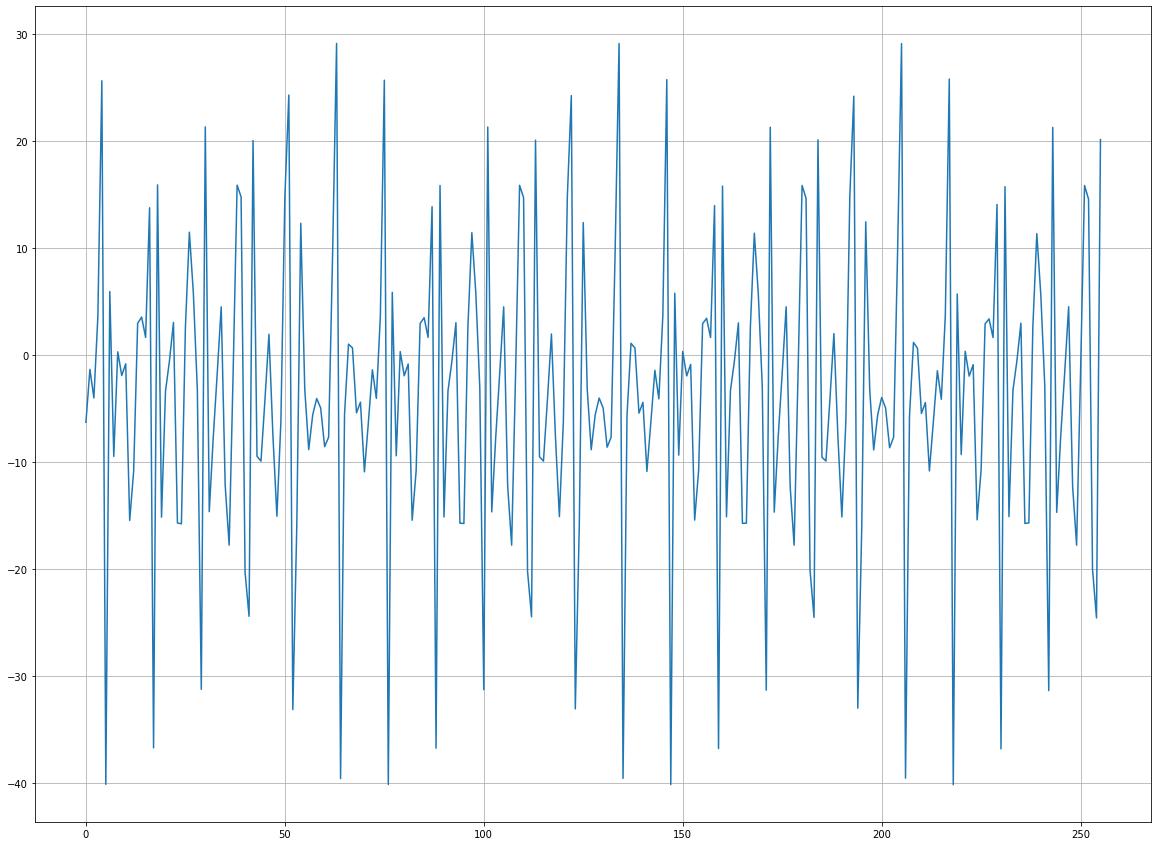

In [25]:
plot(x)

In [26]:
# таблиця коефіцієнтів w[p][k] від N/2
w_coeff = np.zeros(shape=(N//2, N//2))
for p in range(N//2):
    for k in range(N//2):
        w_coeff[p][k] = cos(4*pi/N * p * k) + sin(4*pi/N * p * k)

In [27]:
# таблиця нових коеф w[p] від N
w_coeff_pN = np.zeros(N)
for p in range(N):
    w_coeff_pN[p] = cos(2*pi/N * p) + sin(2*pi/N * p)

In [28]:
# непарні
F_I = np.zeros(N//2)
# парні
F_II = np.zeros(N//2)
# кінцева ф-я
F = np.zeros(N)

In [29]:
# рахуємо окремо для парних і непарних частин функцій
for p in range(N//2):
    for k in range(N//2):
        # для парних
        F_II[p] += x[2*k] * w_coeff[p][k]
        # для непарних
        F_I[p] += x[2*k + 1] * w_coeff[p][k]

In [30]:
for p in range(N):
    if p < (N//2):
        F[p] += F_II[p] + w_coeff_pN[p] * F_I[p]
    else:
        F[p] += F_II[p - (N//2)] - w_coeff_pN[p] * F_I[p - (N//2)]

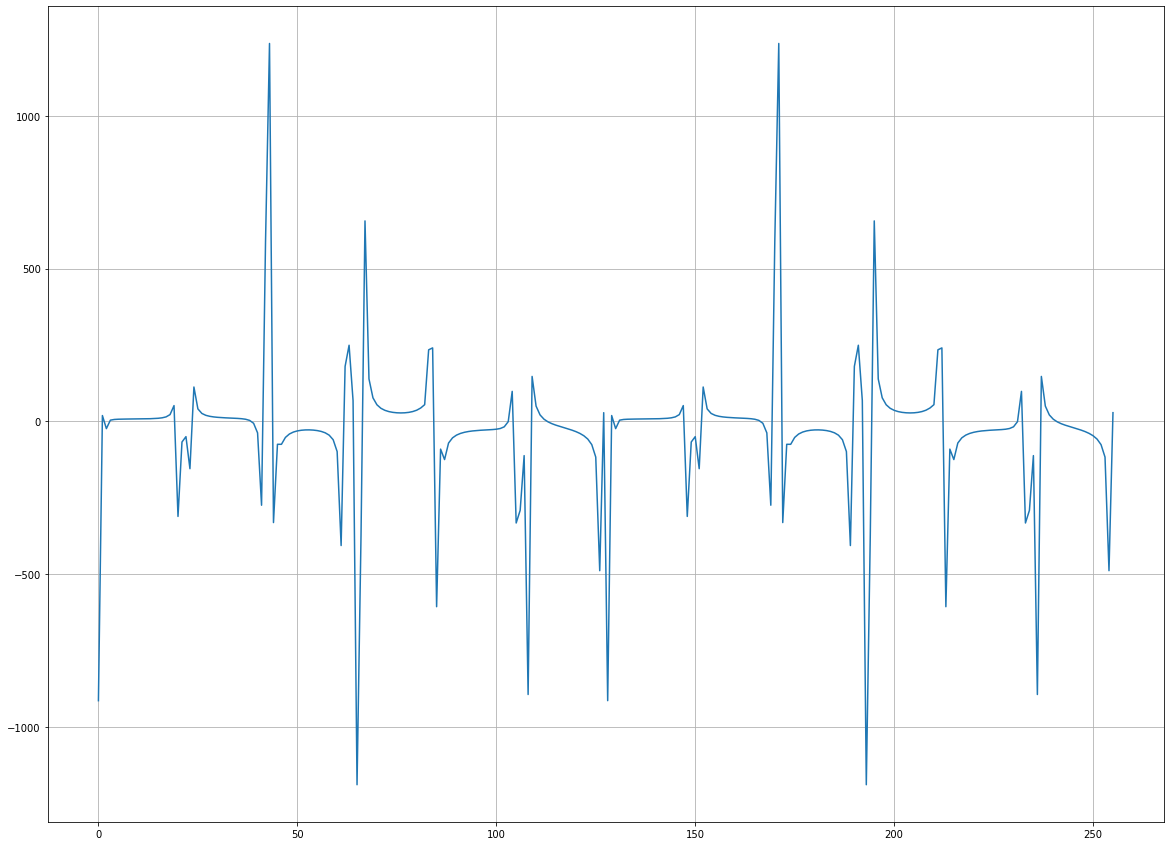

In [31]:
plot(F)